In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',500)

In [301]:
from chembl_webresource_client.new_client import new_client

In [302]:
target = new_client.target
required_target = target.search('acetylcholinesterase')
df = pd.DataFrame(required_target)

In [303]:
df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [304]:
# Going to focus only on Acetylcholinesterase in homo-sapiens
selection = df['target_chembl_id'][0]

In [305]:
activity = new_client.activity
df2 = pd.DataFrame(activity.filter(target_chembl_id = selection).filter(standard_type = 'IC50'))

In [306]:
# Standard type : IC50 (i.e refers to a drug in which we are reducing the biological activity of the enzyme/protein by 50%)
# Standard value : Amount of drug required to reduce the biological activity by 50%. Lower the value, the better.
# Each row is basically referring to a different compound which can be used for inhibiting the target protein represented by 
# the "target_chembl_id" within the chembl database.
df2.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '19.61', 'le': '0.36', 'lle': '3.32', ...",CHEMBL133897,None,CHEMBL133897,6.12,0,http://www.openphacts.org/units/Nanomolar,252547,=,1,1,=,None,IC50,nM,None,750.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '18.57', 'le': '0.38', 'lle': '2.45', ...",CHEMBL336398,None,CHEMBL336398,7.00,0,http://www.openphacts.org/units/Nanomolar,252533,=,1,1,=,None,IC50,nM,None,100.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,None,CHEMBL131588,None,CHEMBL131588,None,0,http://www.openphacts.org/units/Nanomolar,252530,>,1,1,>,None,IC50,nM,None,50000.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '16.11', 'le': '0.34', 'lle': '1.81', ...",CHEMBL130628,None,CHEMBL130628,6.52,0,http://www.openphacts.org/units/Nanomolar,252534,=,1,1,=,None,IC50,nM,None,300.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,None,None,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '17.60', 'le': '0.36', 'lle': '3.00', ...",CHEMBL130478,None,CHEMBL130478,6.10,0,http://www.openphacts.org/units/Nanomolar,252552,=,1,1,=,None,IC50,nM,None,800.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [307]:
df2.shape

(8395, 45)

In [308]:
# For our prediction, we mainly require "canonical_smiles" & "standard value", and hence we need to drop any rows which have
# a null value for it.

df2 = df2[(~df2['canonical_smiles'].isna()) & (~df2['standard_value'].isna())]

In [309]:
# After removing the rows having null values, we are left with 7127 rows.
df2.shape

(7127, 45)

In [310]:
# Have to check if duplicate molecules are present within the dataset, by checking the canonical_smiles.
df2 = df2.drop_duplicates(['canonical_smiles'])

In [311]:
df2.shape

(5824, 45)

In [312]:
df2['standard_value'] = df2['standard_value'].astype('float64')

In [313]:
df2[df2['standard_value'] == 0.0]

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
7994,None,22958561,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4768259,Inhibition of human erythrocyte AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,single protein format,COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...,Outside typical range,Values for this activity type are unusually la...,CHEMBL4765271,Eur J Med Chem,2020.0,None,CHEMBL4780352,None,CHEMBL4803356,None,0,http://www.openphacts.org/units/Nanomolar,3565246,=,1,1,=,None,IC50,nM,None,0.0,CHEMBL220,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.0


In [314]:
df2 = df2.drop(labels=7994, axis=0)

In [315]:
df2.shape

(5823, 45)

In [316]:
# Taking only the columns of interest
df3 = df2[['molecule_chembl_id','canonical_smiles','standard_value']]

In [317]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0


In [318]:
df3['standard_value'] = df3['standard_value'].astype('float64')

<ipython-input-318-091f3a3bee55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['standard_value'] = df3['standard_value'].astype('float64')


In [319]:
df3 = df3.reset_index(drop = True)

In [320]:
df3.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
dtype: object

In [321]:
df3['bioactivity_class'] = ""
for i in range(0,df3.shape[0]):
    if df3.loc[i,'standard_value'] <=1000 :
        df3.loc[i,'bioactivity_class'] = "active"
    elif df3.loc[i,'standard_value'] >=10000 :
        df3.loc[i,'bioactivity_class'] = "inactive"
    else:
        df3.loc[i,'bioactivity_class'] = "intermediate"

In [322]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [323]:
df3['bioactivity_class'].nunique()

3

### Calculating Lipinski Descriptors 

In [324]:
#By using the Lipinski Descriptors, we can find the druglikeness of compounds(i.e how well the body reacts to the drug).

In [325]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [326]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    i=0  
    baseData= np.arange(1,1)
    
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [327]:
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5818,562.154,7.8680,4.0,5.0
5819,506.094,7.3886,3.0,4.0
5820,523.121,5.9852,2.0,4.0
5821,547.143,7.0315,3.0,4.0


In [328]:
df3 = pd.concat([df3,df_lipinski], axis = 1)

In [329]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0


### Converting IC50 values into pIC50

In [330]:
# Sometimes, IC50 values are converted to the pIC50 scale.
# pIC50 = -log(IC50) to base 10
# Due to the minus sign, higher values of pIC50 indicate exponentially more potent inhibitors. pIC50 is usually given in 
# terms of molar concentration (mol/L, or M), thus requiring IC50 in units of M.

In [331]:
# Step 1: Multiply the IC50 values into 10^-9 to convert from nM to M
# Step 2: Apply the -log function on the IC50 values
# Step 3: For values greater that 100,000,000 when we apply -log function the value will be come negative. Hence, any value
# greater than 100,000,000 will be fixed at 100,000,000 itself.

In [332]:
for i in range(0,df3.shape[0]):
    if df3.loc[i,'standard_value'] >100000000:
        df3.loc[i,'standard_value'] = 100000000

In [333]:
df3['standard_value_in_M'] = df3['standard_value'] * pow(10,-9)

In [334]:
df3['pIC50'] = -np.log10(df3['standard_value_in_M'])

In [335]:
df3 = df3.drop(['standard_value_in_M'], axis = 1)

In [336]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0,6.096910


In [337]:
df3['pIC50'].describe()

count    5823.000000
mean        5.819653
std         1.582961
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max        14.301030
Name: pIC50, dtype: float64

In [338]:
df3 = df3[df3['bioactivity_class'] != 'intermediate']

In [400]:
df3 = df3.reset_index(drop = True)

In [339]:
df3.shape

(4365, 9)

### EDA

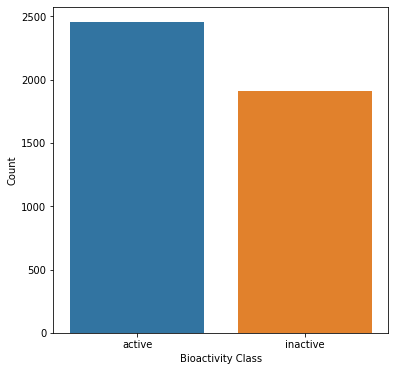

In [341]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'bioactivity_class',data = df3)

plt.xlabel('Bioactivity Class')
plt.ylabel('Count')
plt.show()

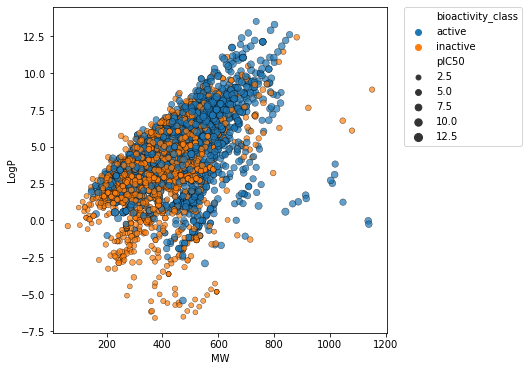

In [343]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=df3, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW')
plt.ylabel('LogP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Text(0, 0.5, 'pIC50 value')

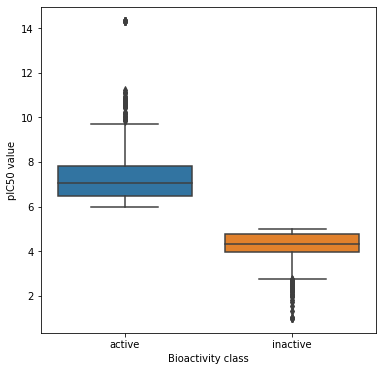

In [344]:
plt.figure(figsize=(6, 6))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df3)

plt.xlabel('Bioactivity class')
plt.ylabel('pIC50 value')

### Mann-Whitney U Test

In [347]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(5)

  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)


  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [348]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

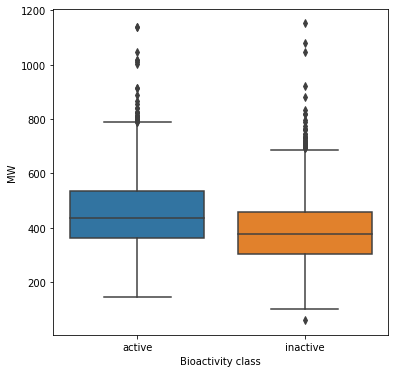

In [350]:
plt.figure(figsize=(6,6))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df3)

plt.xlabel('Bioactivity class')
plt.ylabel('MW')


In [351]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1652010.0,1.961037e-63,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

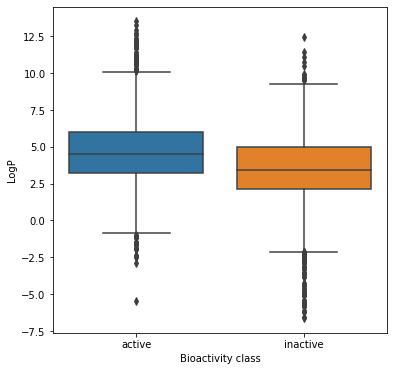

In [352]:
plt.figure(figsize=(6,6))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df3)

plt.xlabel('Bioactivity class')
plt.ylabel('LogP')


In [354]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1688835.5,4.336939e-57,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

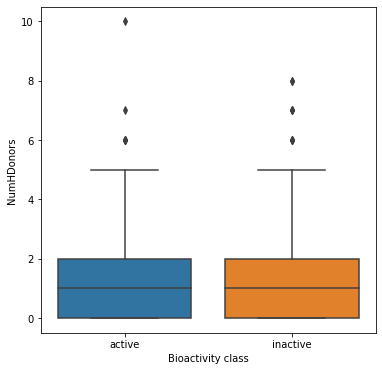

In [355]:
plt.figure(figsize=(6,6))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df3)

plt.xlabel('Bioactivity class')
plt.ylabel('NumHDonors')

In [356]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1992962.0,2.314659e-19,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHAcceptors')

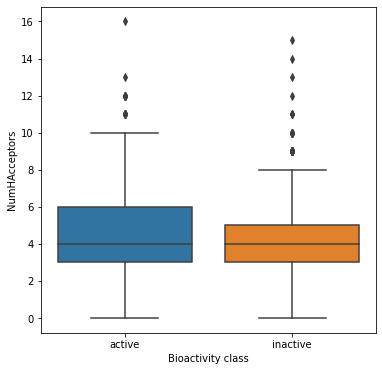

In [357]:
plt.figure(figsize=(6,6))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df3)

plt.xlabel('Bioactivity class')
plt.ylabel('NumHAcceptors')

In [358]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2115570.0,8.951533e-09,0.05,Different distribution (reject H0)


In [382]:
fp = {"PubChem":"PubchemFingerprinter.xml"}

In [386]:
df4 = pd.concat( [df3['canonical_smiles'],df3['molecule_chembl_id']], axis=1 )
df4.to_csv('molecule.smi', sep='\t', index=False, header=False)
df4

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
5818,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,CHEMBL4859103
5819,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,CHEMBL4863615
5820,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,CHEMBL4854913
5821,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,CHEMBL4848527


In [388]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [389]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [393]:
df_fg = pd.read_csv(fingerprint_output_file)

In [396]:
df_fg = df_fg.drop(['Name'],axis = 1)

In [401]:
final_df = pd.concat([df_fg,df3['pIC50']],axis = 1) 

In [402]:
final_df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,...,PubchemFP632,PubchemFP633,PubchemFP634,PubchemFP635,PubchemFP636,PubchemFP637,PubchemFP638,PubchemFP639,PubchemFP640,PubchemFP641,PubchemFP642,PubchemFP643,PubchemFP644,PubchemFP645,PubchemFP646,PubchemFP647,PubchemFP648,PubchemFP649,PubchemFP650,PubchemFP651,PubchemFP652,PubchemFP653,PubchemFP654,PubchemFP655,PubchemFP656,PubchemFP657,PubchemFP658,PubchemFP659,PubchemFP660,PubchemFP661,PubchemFP662,PubchemFP663,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP669,PubchemFP670,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP675,PubchemFP676,PubchemFP677,PubchemFP678,PubchemFP679,PubchemFP680,PubchemFP681,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP687,PubchemFP688,PubchemFP689,PubchemFP690,PubchemFP691,PubchemFP692,PubchemFP693,PubchemFP694,PubchemFP695,PubchemFP696,PubchemFP6

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [405]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [408]:
X = final_df.iloc[:,0:-1]

In [412]:
Y = final_df.iloc[:,-1]

In [425]:
vt = VarianceThreshold(threshold=(0.15))    
X = vt.fit_transform(X)

In [426]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)

In [429]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
model_train,prediction_train = clf.fit(X_train, X_train, Y_train, Y_train)
model_test,prediction_test = clf.fit(X_train, X_test, Y_train, Y_test)

 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [00:59<00:02,  1.33s/it]

[11:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [00:41<00:02,  1.10s/it]

[11:55:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:43<00:00,  1.07s/it]


In [431]:
prediction_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.91,0.91,0.53,0.10
ExtraTreeRegressor,0.91,0.91,0.53,0.13
ExtraTreesRegressor,0.91,0.91,0.53,5.37
GaussianProcessRegressor,0.91,0.91,0.53,6.38
RandomForestRegressor,0.87,0.88,0.63,4.25
BaggingRegressor,0.85,0.86,0.67,0.54
MLPRegressor,0.83,0.84,0.72,8.80
HistGradientBoostingRegressor,0.73,0.74,0.91,7.46
LGBMRegressor,0.72,0.73,0.94,0.55


In [432]:
prediction_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.49,0.58,1.19,2.89
RandomForestRegressor,0.49,0.57,1.20,4.02
LGBMRegressor,0.48,0.57,1.21,0.34
BaggingRegressor,0.44,0.54,1.25,0.47
SVR,0.42,0.52,1.28,2.78
NuSVR,0.41,0.51,1.29,2.16
KNeighborsRegressor,0.40,0.50,1.30,0.76
MLPRegressor,0.38,0.49,1.32,8.33
XGBRegressor,0.34,0.45,1.36,1.66


In [433]:
# Since Random Forest was the the best considering both the train and test data, we'll fit and hypertune it.

In [449]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [450]:
random_forest = RandomForestRegressor()

In [451]:
random_forest.fit(X_train,Y_train)

RandomForestRegressor()

In [452]:
pred = random_forest.predict(X_test)

In [453]:
print('R2 Score: ',r2_score(Y_test,pred))
print('MAE: ',mean_absolute_error(Y_test,pred))

R2 Score:  0.5711335414233913
MAE:  0.8427704376713255


In [454]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [460]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 30)]
max_depth = [1,2,3,4]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'bootstrap':bootstrap}
grid_forest = GridSearchCV(random_forest,param_grid = param_grid,cv = 10, n_jobs = -1)
grid_forest.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 10, 10, 11, 11, 12, 12, 12, 13,
                                          13, 14, 14, 14, 15, 15, 16, 16, 16,
                                          17, 17, 18, 18, 18, 19, 19, 20, 20,
                                          21, 21, 21, ...]})

In [461]:
grid_forest.best_params_

{'bootstrap': True, 'max_depth': 4, 'n_estimators': 19}

In [464]:
pred_hyper = grid_forest.predict(X_test)

In [465]:
print('R2 Score: ',r2_score(Y_test,pred_hyper))
print('MAE: ',mean_absolute_error(Y_test,pred_hyper))

R2 Score:  0.32898378913897586
MAE:  1.217265466197187


In [466]:
# The default forest was better than the hyperparametered one.

In [470]:
import pickle

In [471]:
pickle.dump(random_forest,open('acetylcholinesterase_model.pkl','wb'))